# Nextclade and Nucmer Concatenation Notebook 
Topic: ***SARS-CoV-2 Clade Identifier using SNP Data with Machine Learning***

This notebook was used for **concatenating** the outputs of the Nextclade tool `nextclade.tsv` and the Mummer tool (Nucmer) `Nucmer.snp` in preparation for ML model training 

August 2021

### Import Library for Data Analysis and visualization 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

### Import the Filtered files 

- Variant Calling Workflow (Mummer/Numcer): `filteredvariantcalling.csv`
- Clade Assignment (NextClade CLI): `filteredcladeassignment.csv`

In [2]:
snp=pd.read_csv('filteredvariantcalling.csv')

In [3]:
snp

,REFPOS,REFBASE,QUERYBASE,SEQ
0,4,1,2,MT843305.1
1,4,1,2,MW240760.1
2,4,1,2,MW466794.1
3,4,1,2,MW466799.1
4,4,1,2,MW483115.1
...,...,...,...,...
15587631,29898,1,4,MZ489948.1
15587632,29900,1,4,MW000361.1
15587633,29900,1,3,MW240745.1
15587634,29900,1,2,MW578225.1


In [4]:
clade=pd.read_csv('filteredcladeassignment.csv')

In [5]:
clade

,clade,sequence_id
0,20B,BS000685.1
1,20B,BS000686.1
2,20B,BS000687.1
3,20B,BS000688.1
4,20B,BS000689.1
...,...,...
290972,"20I (Alpha, V1)",MZ207316.1
290973,"20I (Alpha, V1)",MZ207317.1
290974,"20I (Alpha, V1)",MZ207329.1
290975,"20I (Alpha, V1)",MZ207334.1


### Merge Outputs by Sequence Accession number to filter the sequences from `clade` dataframe and `snp` dataframe

In [6]:
snp=snp.merge(clade,how='inner',left_on='SEQ',right_on='sequence_id')

In [7]:
snp

,REFPOS,REFBASE,QUERYBASE,SEQ,clade,sequence_id
0,4,1,2,MT843305.1,20C,MT843305.1
1,241,4,2,MT843305.1,20C,MT843305.1
2,1059,4,2,MT843305.1,20C,MT843305.1
3,3037,4,2,MT843305.1,20C,MT843305.1
4,14408,4,2,MT843305.1,20C,MT843305.1
...,...,...,...,...,...,...
8443674,29711,3,2,MW191281.1,19A,MW191281.1
8443675,29711,3,2,MW191449.1,19A,MW191449.1
8443676,29711,3,2,MW483187.1,19A,MW483187.1
8443677,29742,3,2,OU490620.1,21A (Delta),OU490620.1


In [8]:
print('Filtered number of sequences: ' + str(len(snp['sequence_id'].unique())))

Filtered number of sequences: 290772


In [9]:
rare_variants=len(snp['sequence_id'].unique())*0.01

In [10]:
print(rare_variants)

2907.7200000000003


### Value counts SNPs by reference position 

In [11]:
snp['REFPOS'].value_counts()

23403    283696
3037     282603
14408    281964
241      274985
28881    126667
          ...  
1224          1
11034         1
24119         1
20510         1
23088         1
Name: REFPOS, Length: 24619, dtype: int64

### Remove rows of SNPs that has less than 1 percent frequency (Rare Variants) in the population (Total Sequences)

In [13]:
snp=snp.groupby('REFPOS').filter(lambda x : len(x)>rare_variants)

In [14]:
snp

,REFPOS,REFBASE,QUERYBASE,SEQ,clade,sequence_id
1,241,4,2,MT843305.1,20C,MT843305.1
2,1059,4,2,MT843305.1,20C,MT843305.1
3,3037,4,2,MT843305.1,20C,MT843305.1
4,14408,4,2,MT843305.1,20C,MT843305.1
6,21137,1,3,MT843305.1,20C,MT843305.1
...,...,...,...,...,...,...
8443613,29402,3,2,OU489396.1,21A (Delta),OU489396.1
8443614,29742,3,2,OU489396.1,21A (Delta),OU489396.1
8443618,29645,3,2,OU490052.1,21A (Delta),OU490052.1
8443619,29742,3,2,OU490052.1,21A (Delta),OU490052.1


In [15]:
len(snp['sequence_id'].unique())

289574

### Pivot the table 
![](photos/pivot.PNG)
* The position of SNP **('REFPOS')** was used as the **columns / features**
* The base character change **('QUERYBASE')** was used as the **values** for the positions 

In [16]:
dataset=snp.pivot_table(index=['sequence_id'],columns=['REFPOS'],values='QUERYBASE',fill_value=0)

In [17]:
dataset

REFPOS,66,201,203,204,210,222,241,445,733,913,...,29753,29754,29755,29756,29757,29758,29759,29760,29764,29834
sequence_id,,,,,,,,,,,,,,,,,,,,,
BS000685.1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BS000686.1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BS000687.1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BS000688.1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BS000689.1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OU535153.1,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OU535154.1,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OU535156.1,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dataset=dataset.merge(clade,how='inner',on='sequence_id')

In [19]:
dataset['clade'].value_counts()

20I (Alpha, V1)    50000
20E (EU1)          42621
20B                42455
20A                30655
20G                28652
20C                24485
21F (Iota)         17752
21A (Delta)        15056
21C (Epsilon)      11069
20F                 9122
20J (Gamma, V3)     7471
19B                 3409
19A                 2771
20D                 2377
20H (Beta, V2)       566
21D (Eta)            557
21G (Lambda)         342
21B (Kappa)          177
21H                   29
21E (Theta)            8
Name: clade, dtype: int64

<AxesSubplot:title={'center':'Clade Distribution in Machine Learning Dataset after preprocessing and cleaning'}, xlabel='clade', ylabel='counts'>

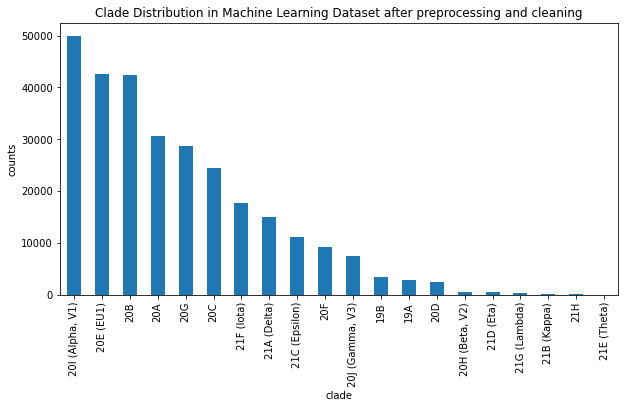

In [20]:
dataset['clade'].value_counts().plot(
    kind='bar',
    xlabel='clade',
    ylabel='counts',
    title='Clade Distribution in Machine Learning Dataset after preprocessing and cleaning',
    figsize=(10,5),
    )

In [21]:
dataset=dataset.replace({1:'A',2:'T',3:'G',4:'C',5:'.'})

In [22]:
dataset

,sequence_id,66,201,203,204,210,222,241,445,733,...,29754,29755,29756,29757,29758,29759,29760,29764,29834,clade
0,BS000685.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
1,BS000686.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
2,BS000687.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
3,BS000688.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
4,BS000689.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289569,OU535153.1,0,0,0,0,T,0,T,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289570,OU535154.1,0,0,0,0,T,0,T,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289571,OU535156.1,0,0,0,0,T,0,T,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289572,OU535157.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)


### Export the table to CSV format ` MLDataset.csv` ready for further processing or model training 

In [34]:
dataset.to_csv('MLDataset.csv',index=False)

### Further analysis (To see which position has the most mutations)

In [24]:
dataset=dataset.replace({'A':1,'T':2,'G':3,'C':4,'.':5})

In [25]:
dataset.describe()

,66,201,203,204,210,222,241,445,733,913,...,29753,29754,29755,29756,29757,29758,29759,29760,29764,29834
count,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,...,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000,289574.000000
mean,0.024792,0.040363,0.051324,0.181446,0.092294,0.056390,1.899525,0.584652,0.103542,0.345321,...,0.101228,0.107820,0.101428,0.099947,0.101038,0.099453,0.100468,0.098721,0.016759,0.015419
std,0.220890,0.398809,0.320749,0.577363,0.420151,0.347174,0.439397,1.413129,0.635216,0.755945,...,0.703305,0.711156,0.700935,0.699602,0.700200,0.698004,0.697542,0.692850,0.203074,0.126559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
value_counts_total=dataset.apply(pd.Series.value_counts)

In [27]:
value_counts_total

,sequence_id,66,201,203,204,210,222,241,445,733,...,29754,29755,29756,29757,29758,29759,29760,29764,29834,clade
0,NaN,285958.0,286590.0,282222.0,263348.0,276217.0,281725.0,14604.0,247251.0,282079.0,...,282691.0,283522.0,283779.0,283585.0,283811.0,283581.0,283791.0,286599.0,285170.0,NaN
1,NaN,54.0,82.0,10.0,159.0,21.0,3.0,19.0,NaN,NaN,...,24.0,47.0,NaN,3.0,1.0,28.0,17.0,1958.0,4383.0,NaN
1.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.8333333333333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OU535153.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OU535154.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OU535156.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OU535157.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
value_counts_total=value_counts_total[1:8]

In [29]:
sum=value_counts_total.sum(axis=0)

In [30]:
sum=sum.sort_values(ascending=False)

In [31]:
sum=sum[:30]

In [32]:
sum

3037     282589.0
14408    281955.0
241      274926.0
28881    126470.0
28882    111366.0
25563     92702.0
1059      82821.0
23604     60096.0
23063     58696.0
23709     51032.0
28977     50585.0
5986      50464.0
14676     50333.0
28048     50261.0
3267      50219.0
23271     50135.0
27972     50134.0
15279     50038.0
913       49995.0
5388      49991.0
28281     49892.0
28282     49890.0
22227     43791.0
6286      42962.0
28869     42619.0
28932     42312.0
29645     41182.0
21614     33026.0
27964     32629.0
27944     31468.0
dtype: float64

<AxesSubplot:title={'center':'Base location with most occurring mutation'}, ylabel='Base Location'>

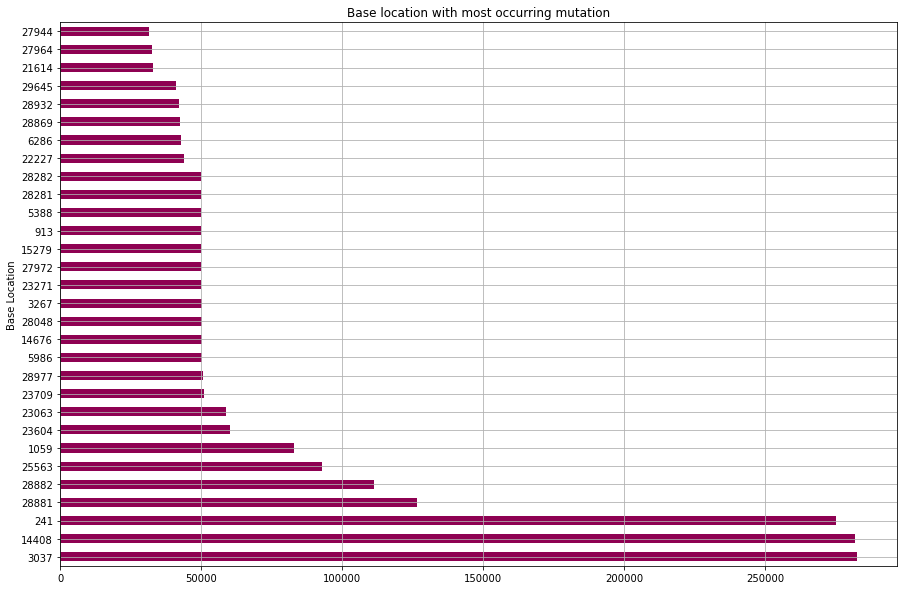

In [33]:
sum.plot(kind='barh',
    xlabel='Base Location',
    ylabel='Number of Sequences that has this mutation',
    title='Base location with most occurring mutation',
    figsize=(15,10),
    grid=True,
    cmap='PiYG',
    )